# 環境構築

標準Python3 + venv(2系も使うならvirtualenv)がいいらしい  
Anacondaは邪悪  
brew + python3(含むvenv) + jupyter noebookの環境を作りたいけど、root権限周りのエラーが頻発する  
→しばらくは環境構築をしやすいpyenv + anacondaで(pyenv上なので環境変数を汚さない)  

2018/1/28追記  
分析するだけならAnaconda邪悪じゃない  
直Anacondaも悪くないらしい

## 仮想環境の構築

```bash
python3 -m venv 'ディレクトリ名'
```

## 仮想環境に入る

```bash
. (半角スペース) '仮想環境ディレクトリ'/bin/activate
```

## 仮想環境から抜ける

```bash
deactivate
```

## よく詰まるポイント

matplotlib系を動かすために必要な追加パッケージ

```bash
sudo apt-get install python-tk
```

# パッケージ管理

pipを使う

## pip

In [ ]:
# バージョン確認
pip -V

# パッケージの確認
pip freeze # 'パッケージ名' == 'バージョン', ライブラリの状態を出力したいときはこっちを使うと良い
pip list   # 'パッケージ名' ('バージョン')

# パッケージのインストール
pip install 'パッケージ名'

# パッケージのアンインストール
pip uninstall 'パッケージ名'

# pipのバージョンアップ
pip install --upgrade pip

# よく使う関数・記法

## ライブラリの読み込み

### 使用ライブラリ

In [6]:
## ライブラリの読み込み
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import *
from tqdm import tqdm
import glob
from IPython.display import Image, display_png
import math

# 2018/1/26五十嵐さんが教えてくれた便利な関数
from IPython.core.display import display
pd.set_option('display.max_columns', None) # 列を無制限に表示する
pd.set_option('display.max_rows', 500) # rows は None にするとどえらいことになるので 500くらいにしとく
sns.set_context('talk')
pd.set_option('display.max_colwidth', 0)

%matplotlib inline
sns.set_style('darkgrid')
plt.rcParams['font.family'] = 'IPAPGothic'
plt.rcParams['font.size'] = 18

/Users/uchide/.pyenv/versions/anaconda3-5.0.0/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/Users/uchide/.pyenv/versions/anaconda3-5.0.0/lib/python3.6/site-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)
/Users/uchide/.pyenv/versions/anaconda3-5.0.0/lib/python3.6/site-packages/sklearn/learning_curve.py:22: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into w

### ライブラリの保管場所

In [1]:
# sys.pathでPYTHON PASSの一覧を確認する
# 自作ファイル、モジュールは/Users/uchide/.ipythonにしまってある
import sys
sys.path

['',
 '/Users/uchide/.pyenv/versions/anaconda3-5.0.0/lib/python36.zip',
 '/Users/uchide/.pyenv/versions/anaconda3-5.0.0/lib/python3.6',
 '/Users/uchide/.pyenv/versions/anaconda3-5.0.0/lib/python3.6/lib-dynload',
 '/Users/uchide/.pyenv/versions/anaconda3-5.0.0/lib/python3.6/site-packages',
 '/Users/uchide/.pyenv/versions/anaconda3-5.0.0/lib/python3.6/site-packages/aeosa',
 '/Users/uchide/.pyenv/versions/anaconda3-5.0.0/lib/python3.6/site-packages/pyknp-0.3-py3.6.egg',
 '/Users/uchide/.pyenv/versions/anaconda3-5.0.0/lib/python3.6/site-packages/IPython/extensions',
 '/Users/uchide/.ipython']

## データの読み込み

### CSV読み込みは基本これ

In [ ]:
data = pd.read_csv('hoge/hoge.csv')

data = {
    'hoge': pd.read_csv('hoge/hoge.csv'),
    'huga': pd.read_csv('huga/huga.csv')
}

 ### ファイル読み込み周り

In [3]:
# pathlib, globを使う
import pathlib
import glob

#スクリプトのあるディレクトリの絶対パスを取得
root_path = pathlib.Path('__file__').resolve().parent
#ファイル相対パス一覧
csv_names = glob.glob('../input/*.csv')
#ファイル絶対パス
csv_path = root_path / csv_names[0]

PosixPath('/Users/uchide/Documents/GitHub/python_memorandum/../input/hoge.csv')

In [10]:
iris = datasets.load_iris()

In [11]:
data = pd.DataFrame(iris.data, columns=iris.feature_names)

In [ ]:
# ファイルの上部を表示
from IPython.core.display import display
pd.set_option('display.max_columns', None) # 列を無制限に表示する
pd.set_option('display.max_rows', 500) # rows は None にするとどえらいことになるので 500くらいにしとく

display(data.head())

## 前処理

### NA周り

In [ ]:
data.dropna()  # 欠測値がある行を取り除く
data.dropna(thresh=3) #  欠測値が3個以上ある行を取り除く
data.dropna(axis=1)  # 欠測値がある列を取り除く
data.dropna(subset=['hoge'])  # hoge列に欠測値がある行を取り除く
data.dropna(subset=['hoge'], axis=1)  # hoge行に欠測値がある列を取り除く
data.fillna(0)  # 欠測値を0で埋める
data.fillna({'name': 'XXX', 'age': 20, 'point': 0}) # 欠測値を列ごとに指定した値で埋める

### 通常フィルター, loc, iloc

切り出し、参照は通常フィルター(でもいい)  
値の代入はloc, iloc(Warningが出るため)

In [ ]:
df.columns.map(lambda x: x.startswith('N')) # Nから始まるカラム名を選択

In [ ]:
df[df['A'].isin([3, 6])] # listでfilterができる
df[~df['A'].isin([3, 6])] # ~でTrue/Falseを反転

In [ ]:
stru[(stru['URL_1'] == 'area') & (stru['URL_2'] == 'hoge')] # 複数条件

In [ ]:
#  .copy() つけないと参照渡しになるため、複製した df を更新するタイミングで警告（SettingWithCopyWarning）が出る。.copy() つけると値渡しになる。
data_select = data[columns].copy() 

In [ ]:
# 値の取り出しはat/iat
df.at['行名', '列名'] 
df.iat['行番号', '列番号']

### データの結合

In [ ]:
pd.concat([hoge, huga]) #行結合
pd.concat([hoge, huga], axis=1) #列結合

pd.merge(left, right, how='left', on=['hoge']) # merge結合、how={inner, left, right, outer}
pd.merge(left, right, how='inner', left_on='key', right_index=True) # 列(左)とindex(右)の結合

left.join(right, how='inner') # indexによる結合、pd.merge()でもできる

### 並び替え

In [ ]:
data.sort_values(by='hoge', ascending=True) #昇順
data.sort_values(by='hoge', ascending=False) #降順

data.sort_index(ascending=True) #インデックスで昇順
data.sort_index(ascending=False) #インデックスで降順

### 行名、列名の変更

In [ ]:
data = data.rename(columns={"before" : "after"}, index = {'before' : 'after'}, inplace=False) #代入したものを変更
data.rename(columns={"age" : "Age"}, inplace=True) #代入せずに直接変更

data.columns = ['hoge', 'huga'] # 列名をまとめて指定
data.index = [1, 2, 3] # 行名をまとめて指定

### 列の入れ替え

In [ ]:
# listで順番を入れ替える
df[['b', 'a', 'c', 'd']]

# あるいは、列名を取り出していじって戻す
lst = df.columns.tolist()
lst.remove('c')
lst.insert(0, 'c')
df[lst]

### 行に対して関数の実行

In [ ]:
data['str_cd'] = data.apply(lambda x: str(x['str_cd']), axis=1) #applyの使い方,axis=1は行、axis=0は列？

### 列をずらして結合

In [ ]:
# transform(func) で、DF/Series を、グループごとに、 func の引数として処理することができる
# shift() で、指定した行だけずらした DF/Series を取得できる
d['from'] = d.groupby(by=['cookie'])['to'].transform(lambda x: x.shift(1))

### カラムをインデックスに引き当て

In [ ]:
df.set_index(['column_name'])

# 逆のことをしたければreset_index()を使う
df.reset_index(drop=False)

### 連番の付与

In [ ]:
df['index_column'] = range(df.shape[0])

### 行、列の削除

In [ ]:
# DataFrame.drop()を使用
# 行はaxis=0(デフォルト)、列はaxis=1(要指定)
df.drop([3,4]) # 行削除
df.drop("A", axis=1) # 列削除

del df['A']　# これでも可

### list

In [ ]:
a_list = ['hoge', 'huga']
a_list.append() # オブジェクトをそのまま追加
a_list.extend() # オブジェクトを要素単位で追加
a_list.drop('hoge') # オブジェクトから要素を削除

### tuple

dictionaryなどのkeyに使う  
後から要素の変更が出来ない

In [ ]:
a_tuple = ('hoge', 'fuga')
a_tuple[0] # 要素の取り出し
new_tuple = a_tuple + ('fizz', 'buzz') # タプルの連結

### dictionary

In [ ]:
a_dict = {'hoge':0, 'huga':1}
a_dict.update(辞書型) #辞書の追加、同じkeyで違うvalueが追加された場合はvalueを上書きする
a_dict.keys() #keyの参照
a_dict.values() #valueの参照

sorted(d.items(), key=lambda x: x[0]) # keyでソート
sorted(d.items(), key=lambda x: x[1]) # valueでソート

### set

In [8]:
#setの作成
a_set = {'hoge', 'huga'}
a_set = set() #空のセット作るときはこれ
set({'dog':'inu', 'cat':'neko', 'bird':'tori'}) #dictonary入れると、keyがsetになる

#setの要素数
len(set)

#setの変更
a_set.add(1) #要素の追加
a_set.emove(1) #要素の削除
a_set.clear() #要素の全削除

#setの演算
a_set | b_set #和集合
a_set & b_set #積集合
a_set - b_set #差集合
a_set.issubset(b_set) #aがbの部分集合ならTrueを返す
a_set.isuperset(b_set) #aがbの親集合ならTrueを返す

### 型変換

In [ ]:
X = np.array(data).reshape(99, 99, 99)

### 値の置換

In [ ]:
# pd.whereを使う
# pd.whereは該当しないものを変換する
import numpy as np
import pandas as pd

cols = ['var1', 'var2', 'var3', 'var4']
df1 = pd.DataFrame(np.random.randn(4, 4), columns=cols)
df2 = pd.DataFrame(np.arange(16).reshape(4, 4), columns=cols)

df1.where(df1 >= 0, df2)
df1['var1'].where(df1['var2'] >= 0, df1['var3'])

# pd.maskは該当するものを変換する

### 文字列処理

#### 文字列を特定の文字で分割して列を増やす

In [ ]:
# 半角空白で分割
for i in range(10):
    df['long_str'+str(i)] = df['long_str'].map(lambda x: str(str(x).split(' ')[i]) if len(str(x).split(' '))>i else '')

#### 特定の文字を含む行を選択

In [1]:
# str.contains('文字')を使う
# 複数選択は'文字　|文字'
# 特定の文字を含む合計n文字の場合は"..x.."(xを含む5文字)
# 特定の文字から始まる場合は"hoge.*"(hogeから始まる任意の文字列)
# 特定の文字で終わる場合は".*s$"(sで終わる任意の文字列、$を付けないとsで終わらないものを含める)
# AAかBBから始まる文字列の場合は"(AA|BB)...."
long_df[long_df['request_url_path'].str.contains('/img/|/css/')]

NameError: name 'long_df' is not defined

### 文字ラベルを数値に変換

In [6]:
# sklearn.preprocessing.labelencoderを使う
from sklearn import preprocessing

# インスタンスの作成
lbl = preprocessing.LabelEncoder()
# 学習
lbl.fit(["paris", "paris", "tokyo", "amsterdam"])

LabelEncoder()

In [7]:
# クラス一覧の表示
list(lbl.classes_)

['amsterdam', 'paris', 'tokyo']

In [8]:
# 変換
lbl.transform(["tokyo", "tokyo", "paris"])

array([2, 2, 1])

In [10]:
# 逆変換
list(lbl.inverse_transform([2, 2, 1]))

['tokyo', 'tokyo', 'paris']

In [11]:
# 実際は学習と変換を同時に行うこれを一番よく使う
lbl.fit_transform(["paris", "paris", "tokyo", "amsterdam"])

array([1, 1, 2, 0])

In [ ]:
# 複数カラムはループ噛ませると便利
for column in ['sex', 'class']:
    # print(titanic[column].shape)
    le = preprocessing.LabelEncoder()
    le.fit(titanic[column])
    titanic[column] = le.transform(titanic[column])

### 行持ち/列持ち変換

In [ ]:
# 列→行はpd.melt
# DataFrame.meltではないので注意
melted = pd.melt(iris, id_vars=['Species'],
                 var_name='variable', value_name='value')

# 行→列はpd.pivot
# pivotするデータの準備。Species (列にする値) と variable (行にする値) の組がユニークでないとダメ。
unpivot = melted.groupby(['Species', 'variable']).sum()
unpivot = unpivot.reset_index()
unpivot.pivot(index='variable', columns='Species', values='value')

### ループ

In [3]:
# 2つのシーケンスを使ったループ
for item1, item2 in zip([1, 2, 3, 4], ['a', 'b', 'c', 'd']):
    print(item1, item2)
    
# index付きのループ
for index, item1 in enumerate(['a', 'b', 'c', 'd']):
    print(index, item1)

1 a
2 b
3 c
4 d
0 a
1 b
2 c
3 d


### 複数列uniqueインデックス

In [ ]:
# レジ番号とレシート番号でユニークになる場合
tmp = data[['reji_no', 'receipt_no']].drop_duplicates()
tmp['buy_cd'] = tmp.index

data = pd.merge(data, tmp, how='left', on=['reji_no', 'receipt_no'])

### genreに対してnumを代入

In [23]:
# 辞書型を使う場合
# itemsで代入していくと行列処理出来るので処理が早くなる

import pandas as pd
df = pd.DataFrame({
    'genre': ['hoge', 'hoge', 'huga']
})

#対応表はdictionaryで渡す
dic = {
    'hoge': 1,
    'huga': 2
}

df['num'] = 0
for g, v in dic.items():
    df.loc[df['genre']==g,'num'] = v

In [16]:
for g, v in genre.items():
    print(g)
    print()
    print(v)

genre

0    hoge
1    huga
Name: genre, dtype: object
num

0    1
1    2
Name: num, dtype: int64


### range

In [ ]:
range('開始する数値', '終了する数値', 'ステップ')

### その他関数

In [12]:
#階乗(!)
import math
math.factorial(10)

#順列(5! = 5*4*3*2*1 = 120)
import itertools
seq = ('a', 'b', 'c', 'd', 'e')
list(itertools.permutations(seq))

#順列(3つを選んで並べる場合, 5P3)
list(itertools.permutations(seq, 3))

#組み合わせ(5C3)
list(itertools.combinations(seq,3))


#累積和
hoge['hoge'].cumsum()

NameError: name 'hoge' is not defined

## 基礎集計

- データの行数  
- NAの数  
- NAの割合  
- 列の型  
    - 数値なら平均、四分位、min、max  
    - 非数値ならカテゴリ数、最頻値  
    - 日付型ならそれも明記
- keyがあればそれも明記

### 行の確認

### 列の確認

In [ ]:
iris[''].nunique() #列のユニーク数を確認
iris['hoge'].unique() #列のユニークな値のリストを返す

In [15]:
data.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)'],
      dtype='object')

In [ ]:
# 注意、as_indexにgroupbyした文字が落ちない場合は、as_index=Falseした後に他の列をcountする

hoge.groupby('hoge', as_index = True)[['hoge']].count()\
.rename(columns={'before':'count'}).sort_values('count', ascending=False)\
.reset_index(drop=True)#列に対して種類毎の出現数を数える

# もっとうまい方法が見つかった
hoge['fuga'].value_counts() #fuga列のユニークな値に対して出現数を数え上げ
hoge.counts # hogeのindexのユニークな値に対して出現数を数え上げ

# groupbyするやり方もある
hoge.groupby("fuga", as_index=False).size() # value_counts()はユニークな値をindexに入れてしまうがこれなら行に残しておける

### NA周り

In [ ]:
hoge.isnull().sum() #列毎にNAの数を合計

### 型の確認

In [ ]:
hoge.dtypes #データフレームを列毎に型の確認

### 数値型周り

In [ ]:
hoge.describe() #要約統計量

### 日付型

In [ ]:
hoge['datetime'] = pd.to_datetime(hoge['datetime']) #日付型に変換

## 算術関数/集約関数/統計関数

ソース  

[Python pandasの算術関数/集約関数/統計関数まとめ](http://sinhrks.hatenablog.com/entry/2014/11/27/232150)

### 準備

In [ ]:
import numpy as np
import pandas as pd

df = pd.DataFrame({'C1': [1, 1, 1],
                   'C2': [1, 1, 1],
                   'C3': [1, 1, 1]})

### 四則演算

In [ ]:
# スカラーの加算はデータ全体に対して適用 ( ブロードキャスト ) される
df + 1

# np.array の加算は 各行に対する加算
df + np.array([1, 2, 3])

# 要素の長さが違う場合は ValueError
df + np.array([1, 2])

# 1列目に [1, 2, 3] を足す
df['C1'] = df['C1'] + np.array([1, 2, 3])

# 3行目 / 3列目の値に 5 を足す
df.iloc[2, 2] += 5

# 複数列に対する演算も OK
# (裏側では DataFrame 選択 -> 計算 -> 代入 をしているだけなので)
df[['C1', 'C2']] -= 5

# データは元に戻す
df = pd.DataFrame({'C1': [1, 1, 1],
                   'C2': [1, 1, 1],
                   'C3': [1, 1, 1]})

### 算術演算メソッド

In [ ]:
#列に対するブロードキャスト
#DataFrame.add()はaxis=0で列に対する演算、axis=1で行に対する演算(デフォルト)
df.add(np.array([1, 2, 3]), axis=0)

df.add(np.array([1, 2, 3]), axis='index')

### 欠測要素へのパディング(埋める)

In [ ]:
# numpy の挙動
np.nan + 1

# NaN を含む DataFrame を定義する
df_nan = pd.DataFrame({'C1': [1, np.nan, np.nan],
                       'C2': [np.nan, 1, np.nan],
                       'C3': [np.nan, np.nan, 1]})

# NaN を含むセルの演算結果は NaN 
df.add(df_nan)

# これを回避するには、fill_valueを使う
df.add(df_nan, fill_value=0)

# データの順序が変わっても有効 ( fill_value は演算対象 両方のデータに適用される)
df_nan.add(df, fill_value=0)

# 要素が 両方とも NaN の場合はパディングされない
df_nan.add(df_nan, fill_value=0)

### 行列積

In [28]:
df2 = pd.DataFrame({'C1': [2, 3],
                    'C2': [4, 5]})
df3 = pd.DataFrame({'C1': [1, -2],
                    'C2': [-3, 4]})

# *でDataFrameの積を取ると、各要素同士の積になる
df2 * df3

# 行列の積を取りたい場合はDataFrame.dot
# 元データのcolumnと引数のindexのラベルが一致している必要があるので、DataFrame.valuesで中身を取り出すか引数を転地させる
# ただし以下2つは計算結果が変わってくるので注意
df2.dot(df3.values)
df2.dot(df3.T)

,0,1
0,-10,12
1,-12,14


### 集約関数

力尽きたのでまた

## 集計

### クロス集計

In [5]:
# pandas.crosstabを使う
import pandas as pd
import numpy as np
a = np.array(["foo", "foo", "foo", "foo", "bar", "bar",
              "bar", "bar", "foo", "foo", "foo"], dtype=object)
b = np.array(["one", "one", "one", "two", "one", "one",
              "one", "two", "two", "two", "one"], dtype=object)
c = np.array(["dull", "dull", "shiny", "dull", "dull", "shiny",
              "shiny", "dull", "shiny", "shiny", "shiny"],
             dtype=object)

pd.crosstab(a, [b, c], rownames=['a'], colnames=['b', 'c']) # rownamesとcolnamesはつけなくてもよい

pd.pivot_table(flights, values="passengers", index="month", columns="year") # これでもOK

b    one        two      
c   dull shiny dull shiny
a                        
bar    1     2    1     0
foo    2     2    1     2

## 分析・検定

### カイ二乗検定

ソース

[漸近理論とシミュレーション(2)](https://qiita.com/ynakayama/items/6b89cb451a73ae7a8990)  

In [4]:
# scipy.stats.chilsquareを使う
import numpy as np
import scipy.stats

s = 204  # 表が出る回数
f = 196  # 裏が出る回数
e = 200  # 期待される回数

# 帰無仮説 (204:196)
observed = np.array([s, f])
# 対立仮説 (200:200)
expected = np.array([e, e])

# カイ二乗検定をおこなう
x2, p = scipy.stats.chisquare(observed, expected)

print("カイ二乗値は %(x2)s" % locals())
print("確率は %(p)s" % locals())

# 統計学的有意水準 0.05 より高いかどうか調べる
if p > 0.05:
    print("有意です")
else:
    print("有意ではありません")

カイ二乗値は 0.16
確率は 0.689156516779
有意です


### 独立性のカイ二乗検定

ソース  

[クロス集計とカイ二乗検定](https://qiita.com/ynakayama/items/67ddb321a8ce5b07274c)

独立性のカイ二乗検定が適用できるかどうかは

* カテゴリー別に見てもサンプル数が十分に確保されているか
* 実際にどのカテゴリーとどのカテゴリーが関連しているのか  

を確認する必要がある

また
> 2×2 分割表ならば、全体の観察数（N）が20未満、または、20<N<40かつ最小期待値が5未満の時は、フィッシャー正確確率検定を使う  

[~統計学の基準値の由来：5%有意水準，カイ二乗検定，相関係数の出典と引用~](https://sites.google.com/site/fishermultiplecomparison/statistics-5-percent)

という話もある

In [ ]:
# クロス集計結果をchi2_contingencyに渡す
import pandas as pd
from scipy import stats

# タブ区切りのテキストデータを読み込む
data = pd.read_csv("data.txt", sep="\t")

# クロス集計をする
crossed = pd.crosstab(data['columnA'], data['columnB'])

# 独立性のカイ二乗検定の関数に渡す
x2, p, dof, expected = stats.chi2_contingency(crossed)

print("カイ二乗値は %(x2)s" % locals())
print("確率は %(p)s" % locals())
print("自由度は %(dof)s" % locals())
print(expected)

if p < 0.05:
    print("有意な差があります")
else:
    print("有意な差がありません")

### フィッシャーの正確確率検定

> 2×2 分割表ならば、全体の観察数（N）が20未満、または、20<N<40かつ最小期待値が5未満の時は、フィッシャー正確確率検定を使う  

[~統計学の基準値の由来：5%有意水準，カイ二乗検定，相関係数の出典と引用~](https://sites.google.com/site/fishermultiplecomparison/statistics-5-percent)

ソース 

理論  
[統計学の基準値の由来：5%有意水準，カイ二乗検定，相関係数の出典と引用](https://sites.google.com/site/fishermultiplecomparison/statistics-5-percent)  
[フィッシャーの正確確率検定](https://ja.wikipedia.org/wiki/フィッシャーの正確確率検定)  

実装  
[データサイエンスをPythonで試す](http://esu-ko.hatenablog.com/entry/2016/03/07/データサイエンスをPythonで試す%281%3A検定%29)

In [ ]:
# 基本的な構文は独立性のカイ二乗検定と一緒
odds, p = stats.fisher_exact(dat_edit)
print("odds ratio:" + str(odds))
print("p値:" + str(p))

### 残差分析

ソース

[Pythonで残差分析](https://qiita.com/Hiroyuki1993/items/dd859913ed8c6d5191e6)

## 描画

日付型の設定は以下  
[dates(公式ドキュメント)](https://matplotlib.org/api/dates_api.html)

In [ ]:
plt.savefig('path.png')

### 複数の描画

In [ ]:
fig = plt.figure(figsize=(9, 15))
fig.subplots_adjust(left=0, right=1, bottom=0, top=0.5)

for i in range(9):
    ax = fig.add_subplot(1, 9, i + 1, xticks=[], yticks=[]) # add_subplot(行数、列数、何番目の図を指すか)
    ax.imshow(train_X[i])

### 値の出現数の棒グラフ

In [ ]:
fig = plt.figure(figsize=(16, 12))
ax = fig.add_subplot(111)
ax.barh(bottom=shelf_DF.index, width=shelf_DF['count'], tick_label=shelf_DF['shelf_name'], align='center')
ax.invert_yaxis()

#### pd.Seriesを棒グラフにしたい場合

In [ ]:
fig = plt.figure(figsize=(16, 12))
ax = fig.add_subplot(111)
data.plot.barh() #pandas plotを使う
ax.invert_yaxis()

#### 任意の棒だけを塗り分けたいとき

In [ ]:
barlist=plt.bar([1,2,3,4], [1,2,3,4])
barlist[0].set_color('r')
plt.show()

### 積み上げヒストグラム

In [ ]:
#出現回数の積み上げヒストグラム+そのライン
#X軸:出現回数
#y軸:累積カテゴリ数
plt.figure(figsize=[16,12])
plt.hist(edge_weight_list, bins=100, cumulative=True, normed=True, alpha=0.5)
plt.hlines(y=0.90, xmin=0, xmax=2533, color='blue', linestyles='dashed')
plt.vlines(x=168.8, ymin=0, ymax=1, color='blue', linestyles='dashed')
plt.show()

### 散布図行列

In [ ]:
sns.pairplot(iris, hue='species');

### histgramの正規化がうまく行かない場合の対処法

In [ ]:
# matplotlibのnormed=Trueは面積が1になるように正規化するため、各binの幅が小さい場合高さが1を越えることがある
# 正規化した重みを別に定義してあげる
weights = np.ones_like(
    data['walkin_rate']) / float(len(data['walkin_rate']))

plt.figure(figsize=[20, 10])
plt.hist(data['walkin_rate'], bins=50, color='blue', alpha=0.8, weights=weights_other, label='hoge')
plt.legend(loc='upper left')
plt.savefig('../output/hogehoge.png')

## 文字列処理

### 文字と数値の出力

In [11]:
print('円周率は{:.2f}です'.format(3.1415)) #formatで代入、{}の中に装飾子入れて出力を調整

円周率は3.14です


### 文字の削除

In [ ]:
"文字列".strip("削除したい文字列") # 先頭と末尾から削除
"文字列".lstrip("削除したい文字列") # 先頭から削除
"文字列".rstrip("削除したい文字列") # 末尾から削除

## Keras

### 学習経過のプロット

In [ ]:
fig, (axL, axR) = plt.subplots(ncols=2, figsize=(10,4))

# loss
def plot_history_loss(fit):
    # Plot the loss in the history
    axL.plot(fit.history['loss'],label="loss for training")
    axL.plot(fit.history['val_loss'],label="loss for validation")
    axL.set_title('model loss')
    axL.set_xlabel('epoch')
    axL.set_ylabel('loss')
    axL.legend(loc='upper right')

# acc
def plot_history_acc(fit):
    # Plot the loss in the history
    axR.plot(fit.history['acc'],label="loss for training")
    axR.plot(fit.history['val_acc'],label="loss for validation")
    axR.set_title('model accuracy')
    axR.set_xlabel('epoch')
    axR.set_ylabel('accuracy')
    axR.legend(loc='upper right')

plot_history_loss(fit)
plot_history_acc(fit)

## JSON

### JSONファイルの書き込み

In [ ]:
savepath = 'sample.json'
with pen(savepath, 'w') as outfile:
    json.dump(data, outfile)

### JSONファイルの読み込み

In [ ]:
try:
    # ローカルJSONファイルの読み込み
    with open('sample.json', 'r') as f:
        data = json.load(f)
        print(data)
except json.JSONDecodeError as e:
    print('JSONDecodeError: ', e)

## 小技

### 画像の表示

In [ ]:
from IPython.display import Image, display_png
display_png(Image('hogehoge.png'))

### np.array

In [6]:
#np.arrayはネストした特定の成分を複数のarrayから持ってこれる
#ただしintとstrなど型が違うと変換される(no.array自体がそういうもの)ので注意
test = np.array([[1, 'b'], [2, 'd']])
test[:, 0]

array(['1', '2'],
      dtype='<U21')

### ループ

In [20]:
#tqdmを使う
#len()で回すよりdata.shape[0]で回した方が高速(DataFrameの場合)
from tqdm import tqdm

a_DF = pd.DataFrame({'a':[1,2,3], 'b':[4,5,6]})
for i in tqdm(range(a_DF.shape[0])):
    print(i)


100%|██████████| 3/3 [00:00<00:00, 1368.45it/s]

0
1
2


In [ ]:
# 
import collections
dic = collections.defaultdict(list)

items = [item for item in pivot.columns if item != '購買']
for i, item1 in enumerate(items):
    for item2 in items[i + 1:]:
        dic['item1'].append(item1)
        dic['item2'].append(item2)
        # クロス集計
        cross = #よしなにする
        display(cross)
        dic['right-top'].append(cross.iloc[0, 1])
        dic['left-bottom'].append(cross.iloc[1, 0])
pd.DataFrame(dic)

### イテレーション

イテレータ:要素を反復して取り出すことの出来るインターフェイス

#### Pandas

1
2
3
a
1
b
2
c
3


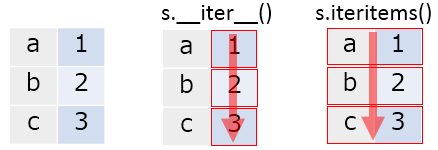

In [6]:
#Series
s = pd.Series([1, 2, 3], index=['a', 'b', 'c'])

for v in s.__iter__():
    print(v)
    
for i, v in s.iteritems():
    print(i)
    print(v)

display_png(Image('./images/Series1.png'))

A
B
A
a    1
b    2
c    3
Name: A, dtype: int64

B
a    4
b    5
c    6
Name: B, dtype: int64

a
A    1
B    4
Name: a, dtype: int64

b
A    2
B    5
Name: b, dtype: int64

c
A    3
B    6
Name: c, dtype: int64



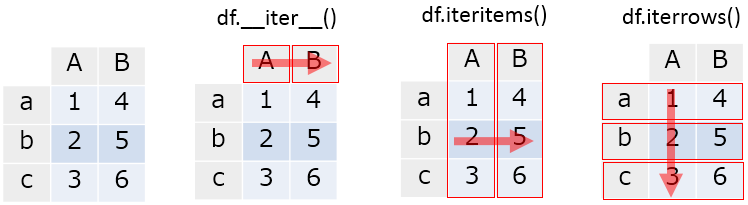

In [13]:
#DataFrame
df = pd.DataFrame(
    {'A': [1, 2, 3],
     'B': [4, 5, 6]},
    index = ['a', 'b', 'c']
)

for col in df.__iter__():
    print(col)
    
for key, column in df.iteritems():
    print(key)
    print(column)
    print('')
    
for key, row in df.iterrows():
    print(key)
    print(row)
    print('')
    
display_png(Image('./images/DataFrame1.png'))

g1
   A  B group
0  1  5    g1
2  3  7    g1

g2
   A  B group
1  2  6    g2
3  4  8    g2



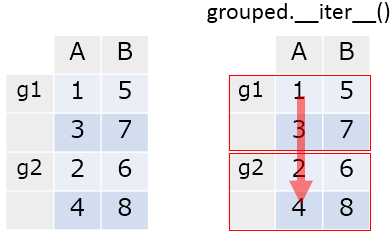

In [7]:
df = pd.DataFrame(
    {'group': ['g1', 'g2', 'g1', 'g2'],
     'A': [1, 2, 3, 4],
     'B': [5, 6, 7, 8]}, 
)
grouped = df.groupby(by='group')

for name, group in grouped:
    print(name)
    print(group)
    print('')
    
display_png(Image('./images/group1.png'))

[「Pandasのデータイテレーション」](http://sinhrks.hatenablog.com/entry/2015/06/18/221747)  
[「イテレータとジェネレータ」](https://qiita.com/tomotaka_ito/items/35f3eb108f587022fa09)

## Numpy

### ファイルの読み書き

In [ ]:
np.save('filepath.npy', '保存したいもの') # 任意のオブジェクトの保存、拡張子は.npy
hoge = np.load('filepath.npy') # 任意の.npyファイルをロード

### arrayの結合

In [ ]:
np.r_[left, right] # 行結合
np.c_[up, down] # 列結合

### sort

In [ ]:
np.sort("np.arrayオブジェクト") # 昇順のソート
np.sort("np.arrayオブジェクト")[:-1] # 降順のソート

 ## networkx

In [ ]:
import networkx as nx

### 基本動作

In [ ]:
# ネットワークの描画
G = nx.Graph()
# 有向グラフ
DG = nx.DiGraph()
# 有向グラフを無向グラフに変換
H = nx.Graph(G)
# 多向グラフ
MG = nx.MultiGraph

# ノードの追加
G.add_nodes_from([(item, {'count': count}) for item, count in zip(node_count_DF['item_x'], node_count_DF['sum_x'])])

# エッジの追加
G.add_edges_from([(item1, item2) for item1, item2 in zip(edge_DF['item_x'], edge_DF['item_y'])])

G.number_of_nodes() # ノード数の確認
G.number_of_edges() # エッジ数の確認

G.degree() # 繋がっているエッジの数の確認
G.degree([0,1,2]) # 特定のノードについてのみ調べる

G.adj  # 全てのノードに対して繋がっているノードを確認
G[0] #ノード0に対して繋がっているノードを確認
G.adj.items() # ノードと繋がっているノードをitemで抽出


G[1][3]['color'] = "blue" # エッジに属性を付与
G.edges[1, 2]['color'] = "red" # エッジに属性を付与

list(nx.connected_components(G)) # グラフをまとまり単位でlist化

nx.clustering(G) # クラスター係数を計算？要調査

for path in nx.all_simple_paths(G, source=10, target=101): # sourceからtargetの全てのパスを返す
    print(path)

### 中心性指標

* グラフの最短距離
 * 離心中心性(eccentricity centrality)
 * 近接中心性(closeness centrality)
 * 調和中心性(?)(harmonic centrality)
 
* グラフ内の繋がりの多さ
 * 次数中心性(degree centrality)
 * 固有ベクトル中心性(eigenvector centrality)
 * ボナチッチのパワー中心性(power centrality)
 * Page Rank

* 情報の媒介や伝達
 * 媒介中心性(betweenness centrality)
 * 情報中心性(information cenotrality)

In [ ]:
G = nx.Graph()

# 離心中心性
nx.eccentricity(G)
# 近接中心性
nx.closeness_centrality(G)
# 調和中心性
nx.harmonic_centrality(G)

# 次数中心性
nx.degree_centrality(G)
# 固有ベクトル中心性
nx.eigenvector_centrality(G)
# ボナチッチのパワー中心性
# 見つからない
# Page Rank
nx.pagerank(G)

# 媒介中心性
nx.betweenness_centrality(G) 
# 情報中心性
# 見つからない

## MeCab

### NEologdの更新

ターミナル上で以下のコードを実行する

```bash
# NEologdをクローンしたリポジトリに移動
cd mecab-ipadic-neologd
# 更新
./bin/install-mecab-ipadic-neologd -n
```

# 心得

## コーディング規約に従う

Pythonはpep8というコーディング規約がある  
要約サイトがあるので以下参照   
https://qiita.com/sartan123/items/7385e907400c4c407eae

基本的には、Jupyter notebookのextensionの中にあるautopep8を有効にして、セルを選択した状態で🔨アイコンを押せばよしなに調整してくれる

## 関数の中身を把握する

`inspect`というモジュールの`getfile`という関数を使って関数が書いてあるpyファイルのパスを見つける  
任意のエディターで開く(自分の場合はatom)

参考 [ターミナルから、Atomでファイルを開いてみる](https://qiita.com/kumewata/items/5967849208f0671a725a)

```python
import inspect
print(inspect.getfile('関数')))
```

```terminal
atom 'ファイルパス'
```

ドキュメント読んだ方が効率がいい場合もあるが、直接ソースコード読むとドキュメントも書いてあるから二度美味しい

## 出来る限りdocumentを読む

## 常に効率化を考える

同じ処理をするコードでも、工夫次第でより短くなったり早くなったりする  
for文の代わりに行列で処理をしたり、len()の代わりにhoge.shape[0]を使ったり、工夫は尽きない

# Markdown記法

## 文字装飾

斜体は*こう*  
強調は**こう**  
両方やりたければ**_こう_**  
取り消しは~~こう~~こう

## List表記

1. まず初めに
2. 次に

 このように内容を書く  
 改行は半角空白を2つ
 
 段落変えたければ改行を2つ  







* アスタリスクでドットを書ける
* 2つ目のドット
 * 3つ目のドット

## 画像

こんな感じ:
![earth1][logo]
[logo]: https://img.discogs.com/YaUCllWyiT1XohOe3yhFQ_hFJWk=/fit-in/600x606/filters:strip_icc():format(jpeg):mode_rgb():quality(90)/discogs-images/R-670301-1412747605-8517.jpeg.jpg

## コード

```python
s = 'Python Syntax highlighting'
print(s)
```

## 表

このように書く

モジュール | クラス
:---: | :---:
モジュールの関数 | メソッド
モジュールの変数 | クラスのアトリビュート
関数内で使う変数 | インスタンスのアトリビュート

## リンク

このように書く 

Markdownシートの他の書き方は、以下を参照  
[「Markdown cheatsheet」](https://github.com/adam-p/markdown-here/wiki/Markdown-Cheatsheet)

# モジュール

## モジュールとは

関数のような機能をまとめ、必要なときに読み込んで使うスクリプトファイル  
プログラムでよく使うデータ、関数はPythonに内蔵されており、「組み込み型」、「組み込みファイル」などと呼ばれている (Built in)

一方、限られた用途で使う定型の処理はモジュールから読み込んで使う  
Pythonに付属しているモジュールの集合体である標準ライブラリの他にも、ネット上からDLして使うサードパーティのモジュールがある

## モジュールとアトリビュート

Pythonのスクリプトファイルやモジュールでは、何種類かの組み込み属性(アトリビュート)が定義される。組み込み属性は、プログラムを実行すると自動的に定義される変数のようなもの。

## モジュール一覧

## アトリビュート一覧

### `__name__`

ファイルがモジュールとしてインポートされた場合、この変数にモジュール名を代入する。  
ファイルを直接実行した場合には、`__main__`という文字列を代入する。  
モジュールが正しく動くかどうかテストする際などに使う

```python
if __name__ == ‘__main__’: #ファイルを直接実行した場合
    print('モジュール名:'.format(__name__))
```

# オブジェクト指向

> * 型があり、アトリビュートを持つのがPythonオブジェクト
> * Pythonは全てがオブジェクトである  

> ~みんなのPython P327~

 `int('20')` というコードは、文字列の20を引数で与えて、int型のクラスインスタンスを作っている、という処理

モジュール | クラス
:---: | :---:
モジュールの関数 | メソッド
モジュールの変数 | クラスのアトリビュート
関数内で使う変数 | インスタンスのアトリビュート

# 高階関数とデコレータ

## 高階関数とは

関数を変数として渡して処理をする関数や、戻り値として関数を返す関数

In [13]:
#関数を受け取り実行する関数
def execute(func, arg):
    return func(arg)

print(execute(int, '100'))

100


In [23]:
# 関数を受け取り実行する関数
def logger(func):
    def inner(*args):
        print('引数:', args)
        return func(*args)
    return inner


# 元の関数
def accumulate(a, b):
    return a + b


# 関数が追加された関数
newfunc = logger(accumulate)
print(accumulate(1, 2))
print()
print(newfunc(1, 2))

3

引数: (1, 2)
3


## デコレータとは

高階関数を使った処理をスマートに記述する機能

In [25]:
# logger()とaccumulate()を組み合わせた上のコードを、デコレータで書き直す
@logger
def accumulate(a, b):
    return a + b


print(accumulate(1, 2))

引数: (1, 2)
3


# クラスの継承

## クラスの継承とは

あるクラスを雛形にして、別のクラスを作ること。  
すでにある設計図をもとに機能を強化した別の設計図を作れる  
Pythonは多重継承に対応  
雛形となるクラスをスーパークラス、それをもとに作られたクラスをサブクラスという

In [30]:
# クラスの継承の例
# まずはスーパークラスを定義する
class Prism:  # 角柱を表現するクラス
    def __init__(self, width, height, depth):
        self.width = width
        self.height = height
        self.depth = depth

    def content(self):
        return self.width * self.height * self.depth


# 次にサブクラスを定義する
# 立方体を表現するクラス
class Cube(Prism):
    def __init__(self, length):
        self.width = self.height = self.depth = length
        
p = Prism(1, 2, 3)
c = Cube(2)

print('角柱の体積:{}㎤'.format(p.content()))
print('立方体の体積:{}㎤'.format(c.content())) #Prismのcontent()が受け継がれているのがわかる

角柱の体積:6㎤
立方体の体積:8㎤


In [37]:
np.log(0.1)

-2.3025850929940455

# GCPとの接続

## GCE

Google Compute Engineの略称  
好きなOSの仮想マシンを立てられる  
米鯖のf1microならタダで永遠に使える  
スペックの確認は``lscpu``コマンド

### GCEにログイン

ターミナルで

```bash
gcloud compute ssh 'インスタンス名'
```

### GCEからログアウト

ログインしている状態のターミナルで
```bash
exit
```

### GCEインスタンスの停止

ターミナルで
```bash
gcloud compute instances stop 'インスタンス名前'
```

### GCEとのファイルのやりとり

ローカルからGCEへファイルをコピー、パスの順を逆にすればGCEからファイルをコピーする事もできる  
ローカルファイルパスは/Users/uchide/~  

```bash
gcloud compute copy-files [LOCAL_FILE_PATH] [INSTANCE_NAME]:~/
```

## GCSとの接続

Google Cloud Storageの略称  
自由に使えるストレージ  
米鯖なら5GBまでタダで永遠に使える

シェルスクリプトからアクセスしたい場合、公式の説明はこちら  
[クイックスタート:gsutilの使用](https://cloud.google.com/storage/docs/quickstart-gsutil?hl=ja)

PythonでアクセスするにはCloud Strage クライアントライブラリを使う  
いまいち理解しきれていないけど詳細は[ここ](https://cloud.google.com/storage/docs/object-basics?hl=ja#storage-upload-object-python)

### APIを使うためのセッティング 

まず、Python用のCloud StrageクライアントアプリをDL  
詳しくはこちら   
[Cloud Storage Client Libraries](https://cloud.google.com/storage/docs/reference/libraries?hl=ja) 

```bash
pip install --upgrade google-cloud-storage
```

次に、APIを使うために環境変数の設定を行う  
詳しくはこちら  
[Getting Started with Authentication](https://cloud.google.com/docs/authentication/getting-started?hl=ja)

### データのインポート、エクスポート

```bash
gsutil cp -r '移したいフォルダ絶対パス' gs://'インポート先のフォルダ絶対パス'
```
macのホームディレクトリは`/Users/uchide`  
ディレクトリなら`-r`をつける  
エクスポートしたいときはローカルマシンのパスとGCSのパスを入れ替える  
GCSに存在しないパスを入力した場合、新しくそのフォルダが作られる

### データの削除

```bash
gstil rm gs://'削除したいファイルやフォルダの絶対パス'
```

### バケットまたはフォルダの内容の一覧表示

```bash
gsutil ls gs://'確認したいフォルダの絶対パス'
```

# Vim

ソースはここ  
[よく使うVimのコマンドまとめ](https://qiita.com/hide/items/5bfe5b322872c61a6896)

## ファイル操作

| key       | 内容           |
|:----------|:---------------|
| ZZ | 上書き保存し、viを終了
| :w |  内容を保存 |
| :q! | 保存せずに終了 |

## モード

| key       | 内容           |
|:----------|:---------------|
| i | 挿入モードへ
| o | 新しい行を追加し挿入モードへ
| R | 上書きモードへ
| v | ビジュアルモードへ
| Ctrl + v | 矩形選択のビジュアルモードへ
| ESC | コマンドモードに戻る
| ctrl + \[ | コマンドモードに戻る
| ctrl + z | vim を一時停止する

## カーソル移動

 key       | 内容           
:----------|:---------------
w | 次の単語 (Word)
b | 前の単語
f(文字) | カーソルがある行の(文字)に移動 (Find)
F(文字) | カーソルがある行の(文字)に移動(逆向き)
0 | 行頭
＾ | 行頭
$ | 行末
% | 対応する括弧に移動
Ctrl + u | 半画面上 (Up)
Ctrl + d | 半画面下 (Down)
zz | カーソルが画面中央になるようにスクロール
Ctrl + o | 古いカーソル位置に戻る。 (Old)|
Ctrl + i | 新しいカーソル位置に進む。 |

## 行移動

 key       | 内容           |
:----------|:---------------|
gg | 最初の行
88G | 88行目
G | 最終行
H | 画面上の最初の行 (Home)
M | 画面上の中央の行 (Middle)
L | 画面上の最後の行 (Last)

## 検索と置換

| key       | 内容           |
|:----------|:---------------|
| * | カーソル下の単語を検索
| # | カーソル下の単語を検索 (上方向に検索)
|:%s/hage/hoge/g | 単語の置換(hageをhogeへ置換)。`%` はファイル全体を表す。


## 編集

 key       | 内容           |
:-----------|:---------------|
. | 直前の変更を繰り返す
u | Undo
Ctrl + r | Redo

## コピー&ペースト

 key       | 内容           |
:-----------|:----------------|
yy | 今いる行をコピー (yank)
p | カーソルの場所に、ペースト
yy5p | 現在の行をコピーし、下に5行追加する
gv | 直前の選択範囲を再選択

## 特殊文字

key       | 内容           |
:-----------|:---------------|
Ctrl-v return | 改行文字の入力
Ctrl-v tab | Tab 文字の入力

## ウィンドウ

 key       | 内容           |
:----------|:---------------|
:vsplit | 画面を左右に分割する
:e filename | 今いるWindowにファイルを開く (Edit)
:e test\*.cc | ワイルドカードを指定してファイルを開く
Ctrl +w h | 左のWindowへ移動
Ctrl + w l | 右のWindowへ移動

## バッファ

 key       | 内容           |
:----------|:---------------|
:buffers | 編集中のバッファ一覧を表示
:bn | 次のバッファに移動
:bd[elete] | バッファを削除

## 単語補完

 key       | 内容           |
:----------|:--------------|
Ctrl + p | 単語補完(前方検索)

## マクロ

 key       | 内容           |
 :----------|:---------------|
q\<letter\> | マクロの記録開始 |
q           | マクロの記録停止 |
@\<letter\> | マクロの実行     |

## レジスタ

| key | 機能 |
|:-------|:-------|
| :reg | レジスタの一覧表示 |
| Ctrl + r " | ヤンクした文字列をペースト |

## コマンドの意味

| key       | 意味           |
|:----------|:---------------|
| g | 繰り返し |
| c | 1回毎に確認 |

## その他

 key       | 内容           |
:----------|:---------------|
:!command | 外部コマンドの実行
: | 範囲選択中に `:` を入力すると、選択領域の範囲指定( `’<,’>` )が自動で挿入された状態でコマンドモードに入る。これを置換に利用すると便利。 (例: :'<,'>s/old/new/g)
Ctrl + a | 数値のインクリメント
Ctrl + x | 数値のデクリメント

# Unix

## 代表的なUnixコマンド

番号 | コマンド | 役割
---: | :--- | :---
1 | mkdir | ディレクトリを作成
2 | cd | カレントディレクトリを作成
3 | pwd | カレントディレクトリを取得
4 | ls | ファイル一覧を取得
5 | rm | ファイルを削除
6 | mv | ファイルを移動
7 | cp | ファイルをコピー
8 | less | ファイルを少しずつ出力
9 | cat | ファイルを結合して出力
10 | echo | 文字列を出力
11 | iconv | 文字コードを変換
12 | curl | ファイルをダウンロード
13 | date | 日付・時刻を表示
14 | tar |アーカイブファイルを処理
15 | unzip | zipファイルを解凍
16 | find | ファイルを検索
17 | grep | 文字列を検索
18 | touch | ファイル属性を変更
19 | file | ファイルの種類を判別
20 | df | ディスク容量を確認
21 | ps | プロセス一覧を表示
22 | ssh | sshでサーバーに接続
23 | scp | sshでサーバーにファイルコピー
24 | sudo |rootユーザーとしてコマンドを実行
25 | man | コマンドのマニュアルを表示
26 | exit | シェルを終了する

ls -1 | wc -l : ファイル数をカウント

# メモ

## 気になる勉強会

初心者でも参加したり運営やったりLT出来るPythonコミュニティないよねっていうお話  
[Gunosyデータマイニング研究会](https://gunosy-dm.connpass.com)  
[fin-py](https://fin-py.connpass.com)

## IPアドレスについて

IPアドレスにはグローバルIPアドレスとローカルIPアドレスがある  
グローバルIPアドレスはプロバイダから契約に応じて(基本ルーター単位)割り振られる  
ローカルIPアドレスはルーターに接続している機器毎に割り振られる  
どちらのIPアドレスも定期的に更新される(固定する事も出来る)

詳細はこちら  
[【グローバルIPアドレス】と【プライベート（ローカル）IPアドレス】の違いと、確認方法についてまとめてみた](http://viral-community.com/other-it/global-private-ip-2004/)

![IPaddress](./images/IPaddress.jpg)

## 自作関数の命名規則

read~:内部/外部のデータを読み込む関数  
get~: 外部からデータを抽出する関数  
make~: 内部のデータを使って新しいものを作る関数  
plot~: 内部/外部のデータを使って新しいものを描画する関数  

説明文  
1文目: その関数は何をするものなのか端的に述べる、「〜から〜で〜する」という形式で書く  
引数の説明は、一行改行してから書き始める、「引数: 説明」の形で書く